In [3]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.2/882.2 kB 13.8 MB/s eta 0:00:00


In [4]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.9 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 36.6/112.6 GB disk)


In [6]:

from ultralytics import YOLO
from IPython.display import Image

In [7]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="suejIs4UPIQgrHikgo7f")
project = rf.workspace("roboflow-universe-projects").project("license-plate-recognition-rxg4e")
version = project.version(4)
dataset = version.download("yolov11")


  Using cached roboflow-1.1.47-py3-none-any.whl.metadata (9.7 kB)
  Using cached idna-3.7-py3-none-any.whl.metadata (9.9 kB)
  Using cached requests_toolbelt-1.0.0-py2.py3-none-any.whl.metadata (14 kB)
Using cached roboflow-1.1.47-py3-none-any.whl (80 kB)
Using cached idna-3.7-py3-none-any.whl (66 kB)
Using cached requests_toolbelt-1.0.0-py2.py3-none-any.whl (54 kB)
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to License-Plate-Recognition-4 in yolov11:: 100%|██████████| 48488/48488 [00:10<00:00, 4480.16it/s]


In [8]:
dataset.location

'/content/License-Plate-Recognition-4'

In [9]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=10 imgsz=416

100% 5.35M/5.35M [00:00<00:00, 165MB/s]
Ultralytics 8.3.9 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/License-Plate-Recognition-4/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, sa

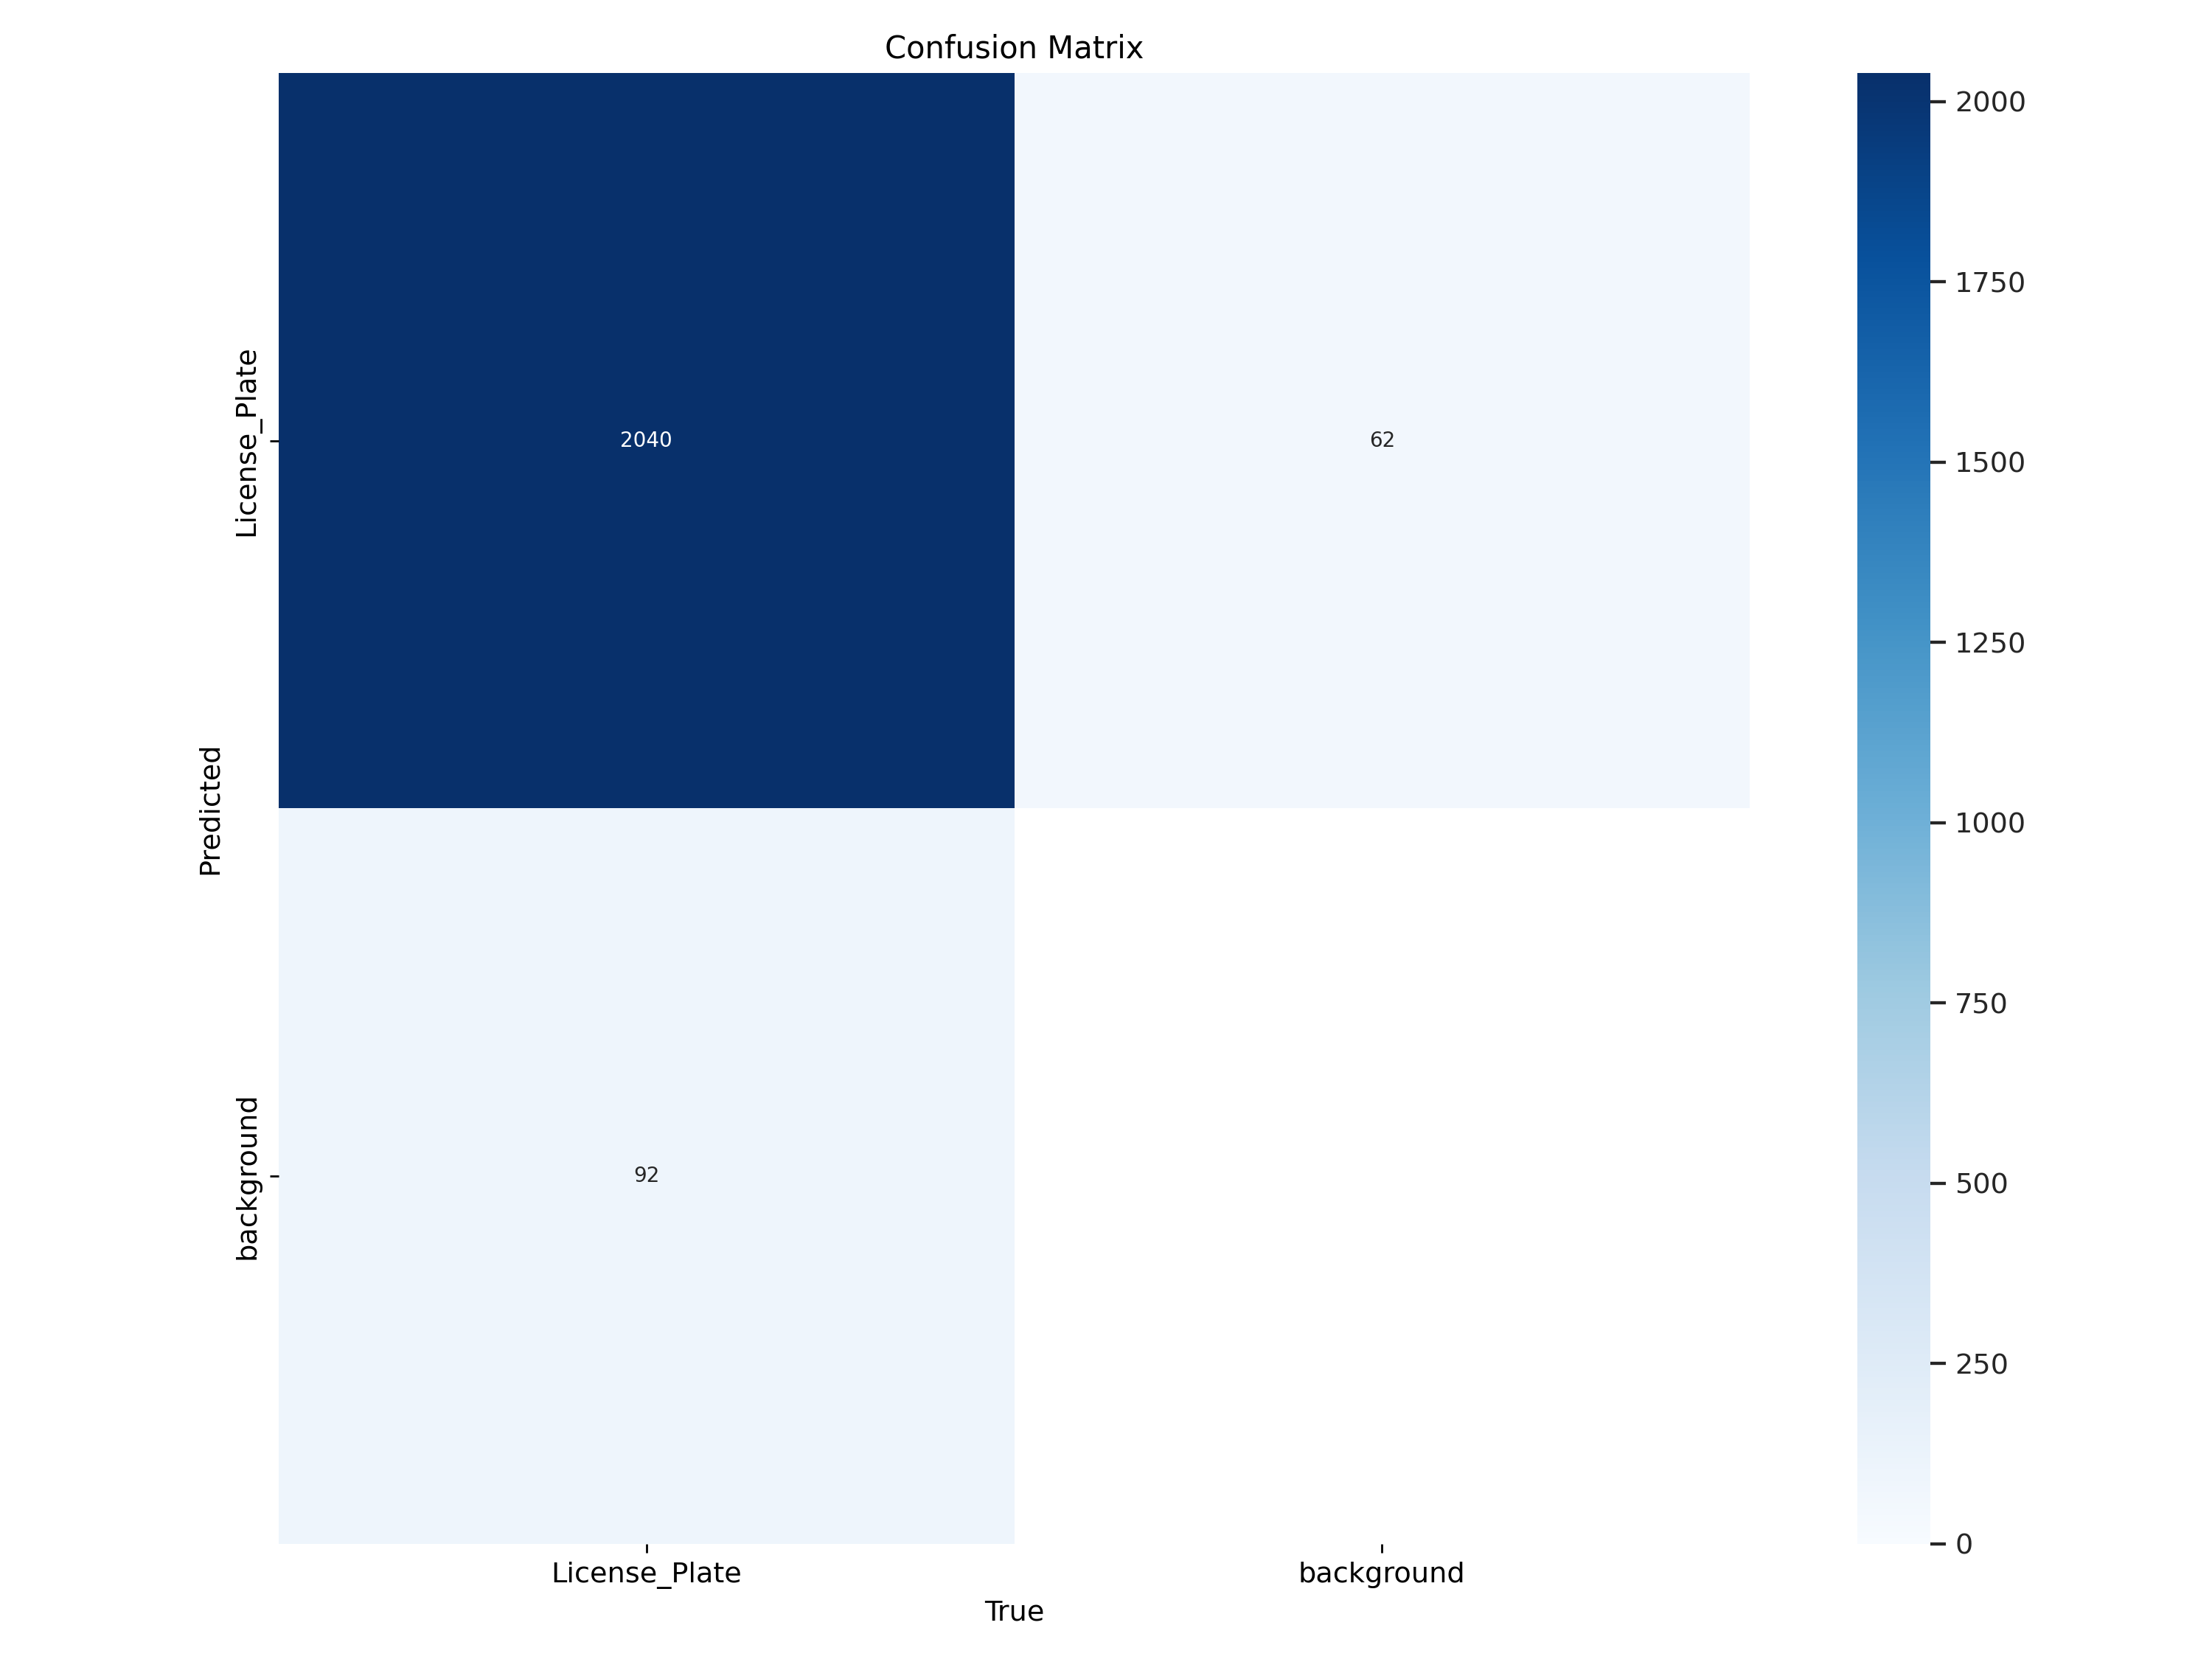

In [10]:
Image("/content/runs/detect/train/confusion_matrix.png", width=600)

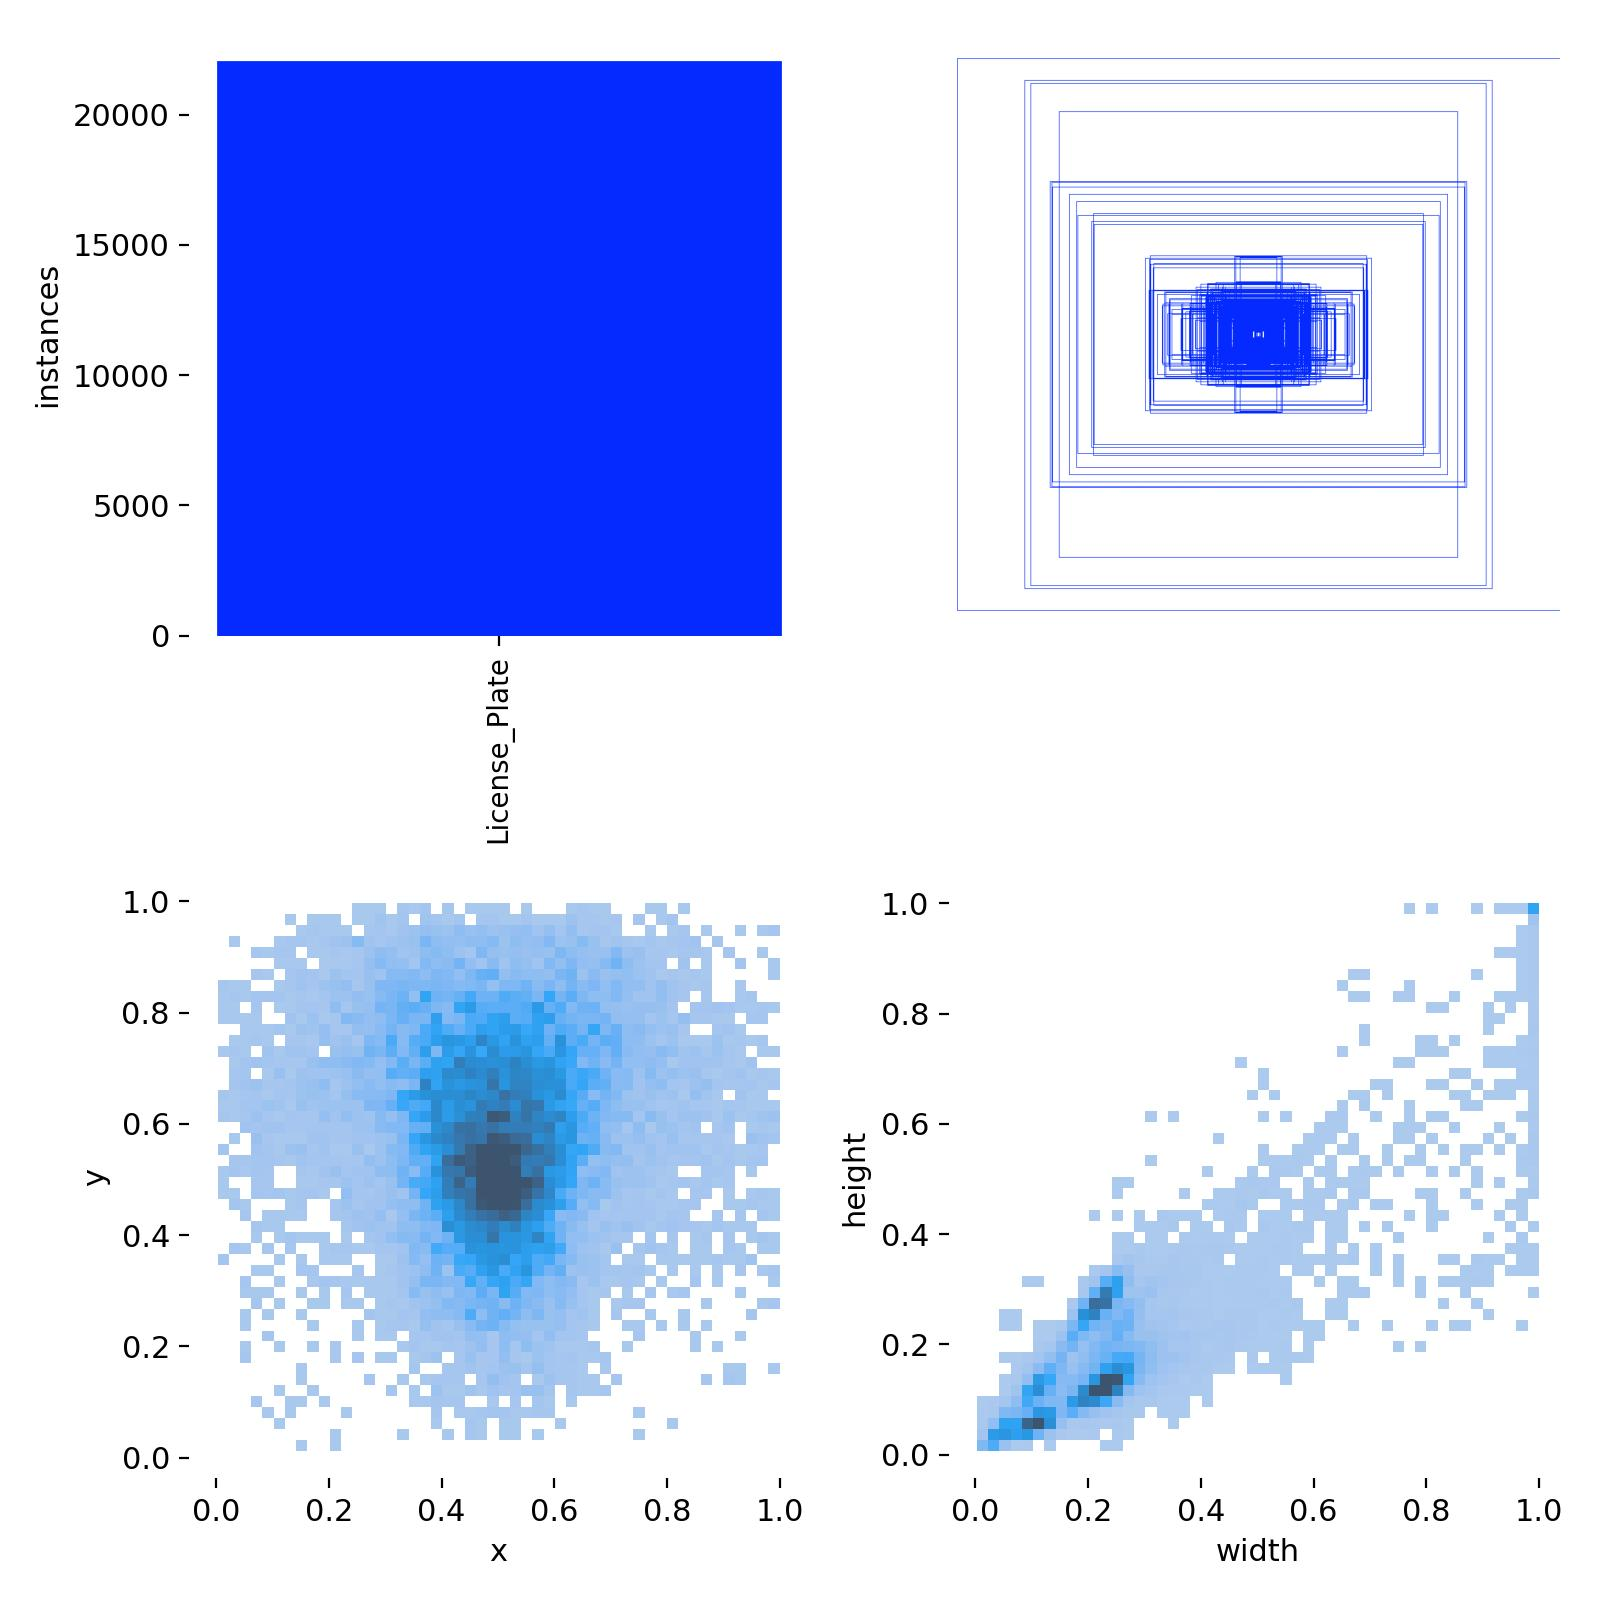

In [11]:
Image("/content/runs/detect/train/labels.jpg", width=600)

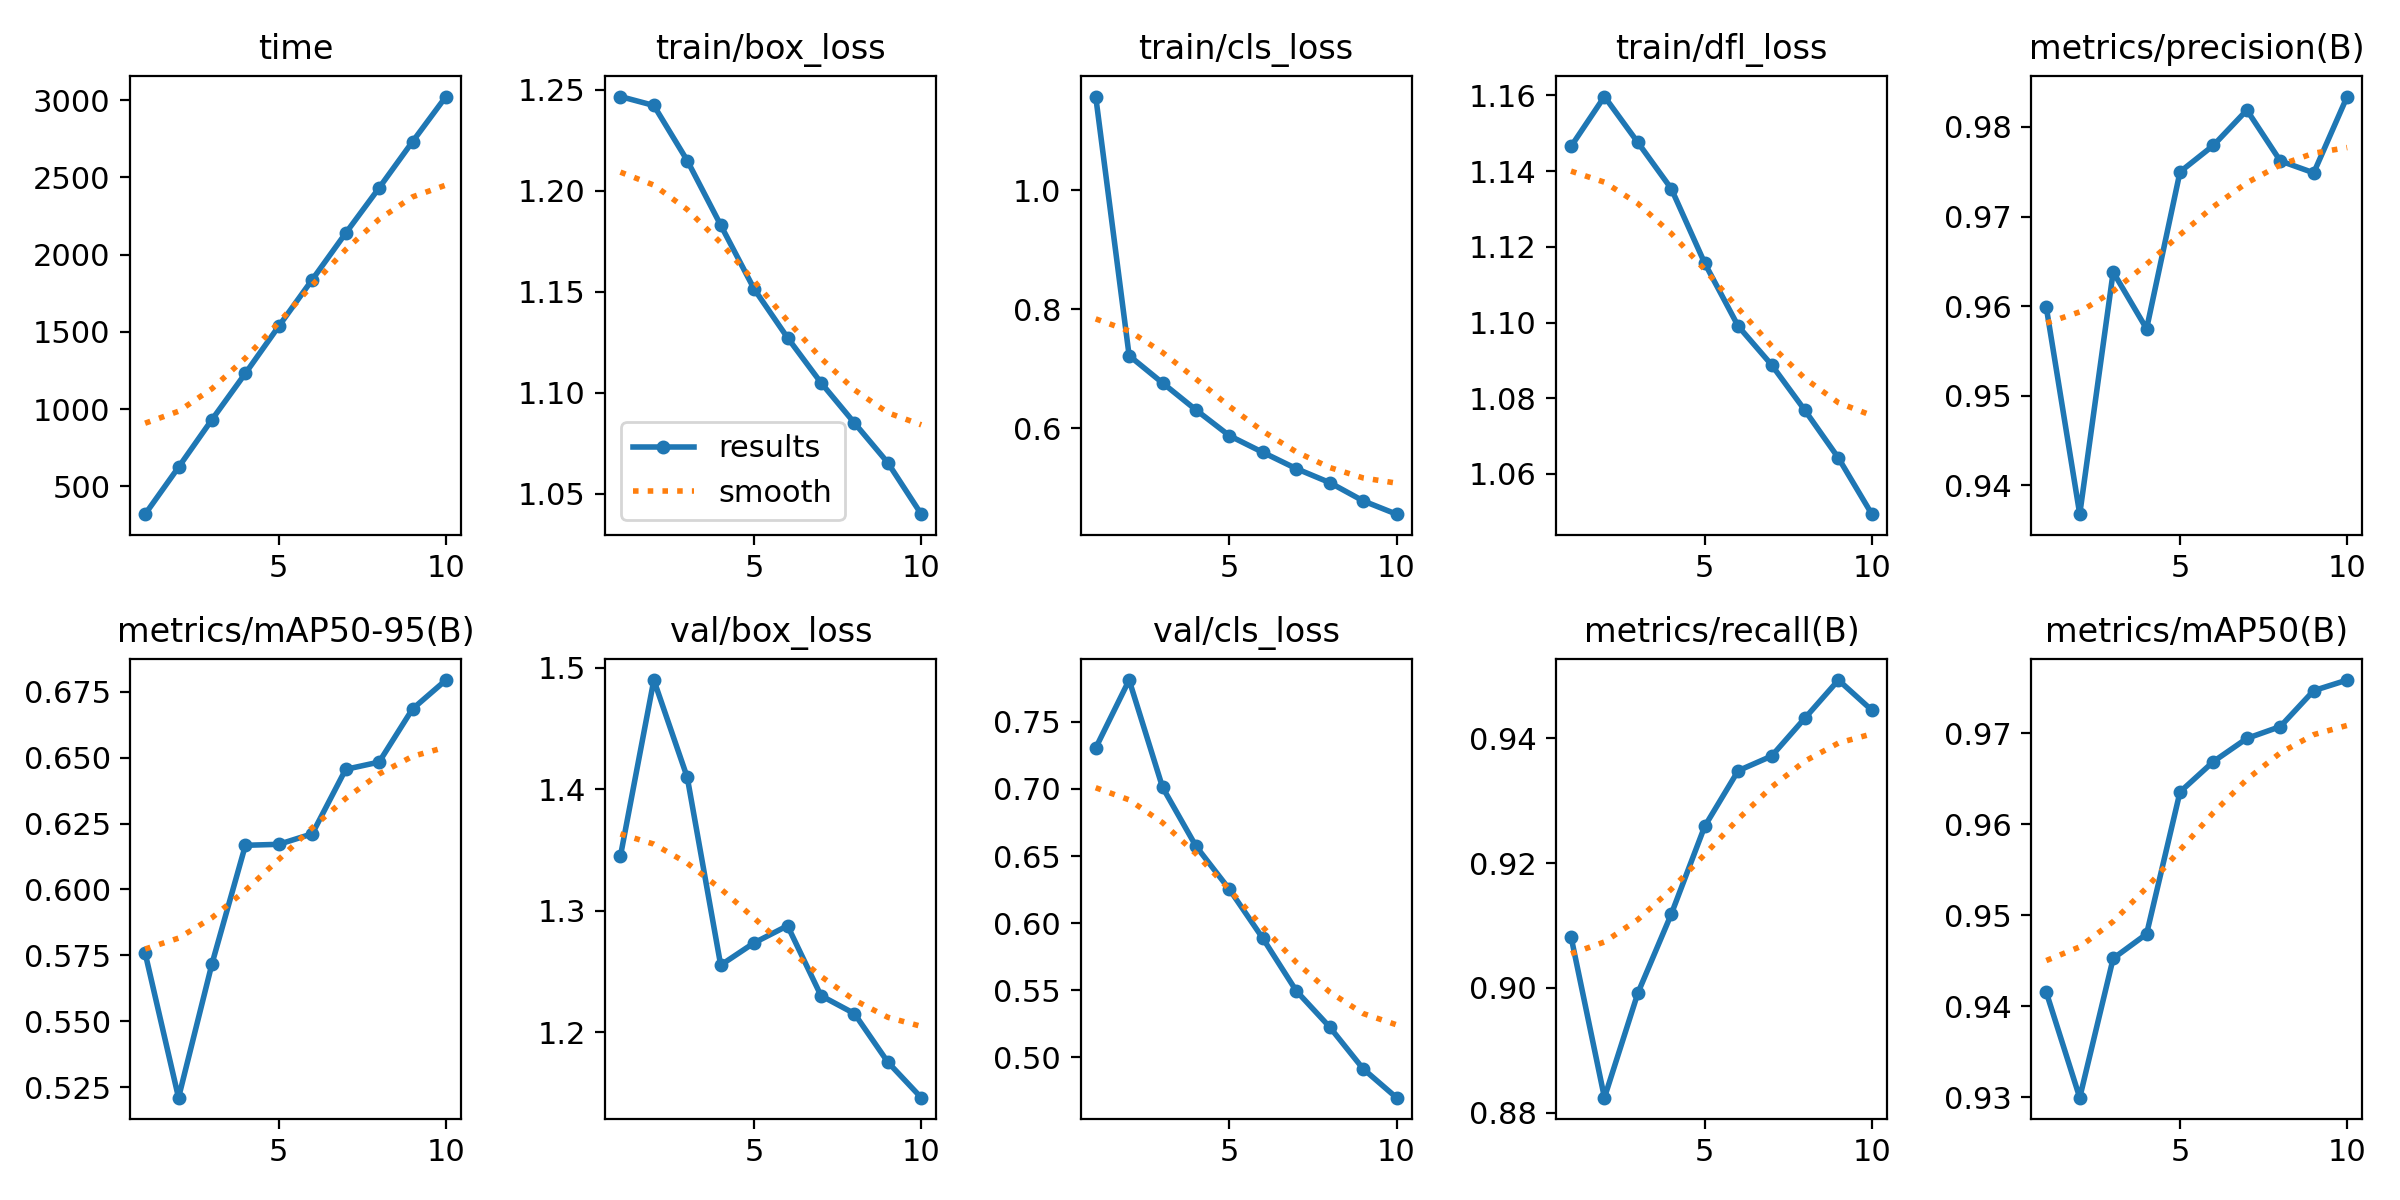

In [12]:
Image("/content/runs/detect/train/results.png", width=600)

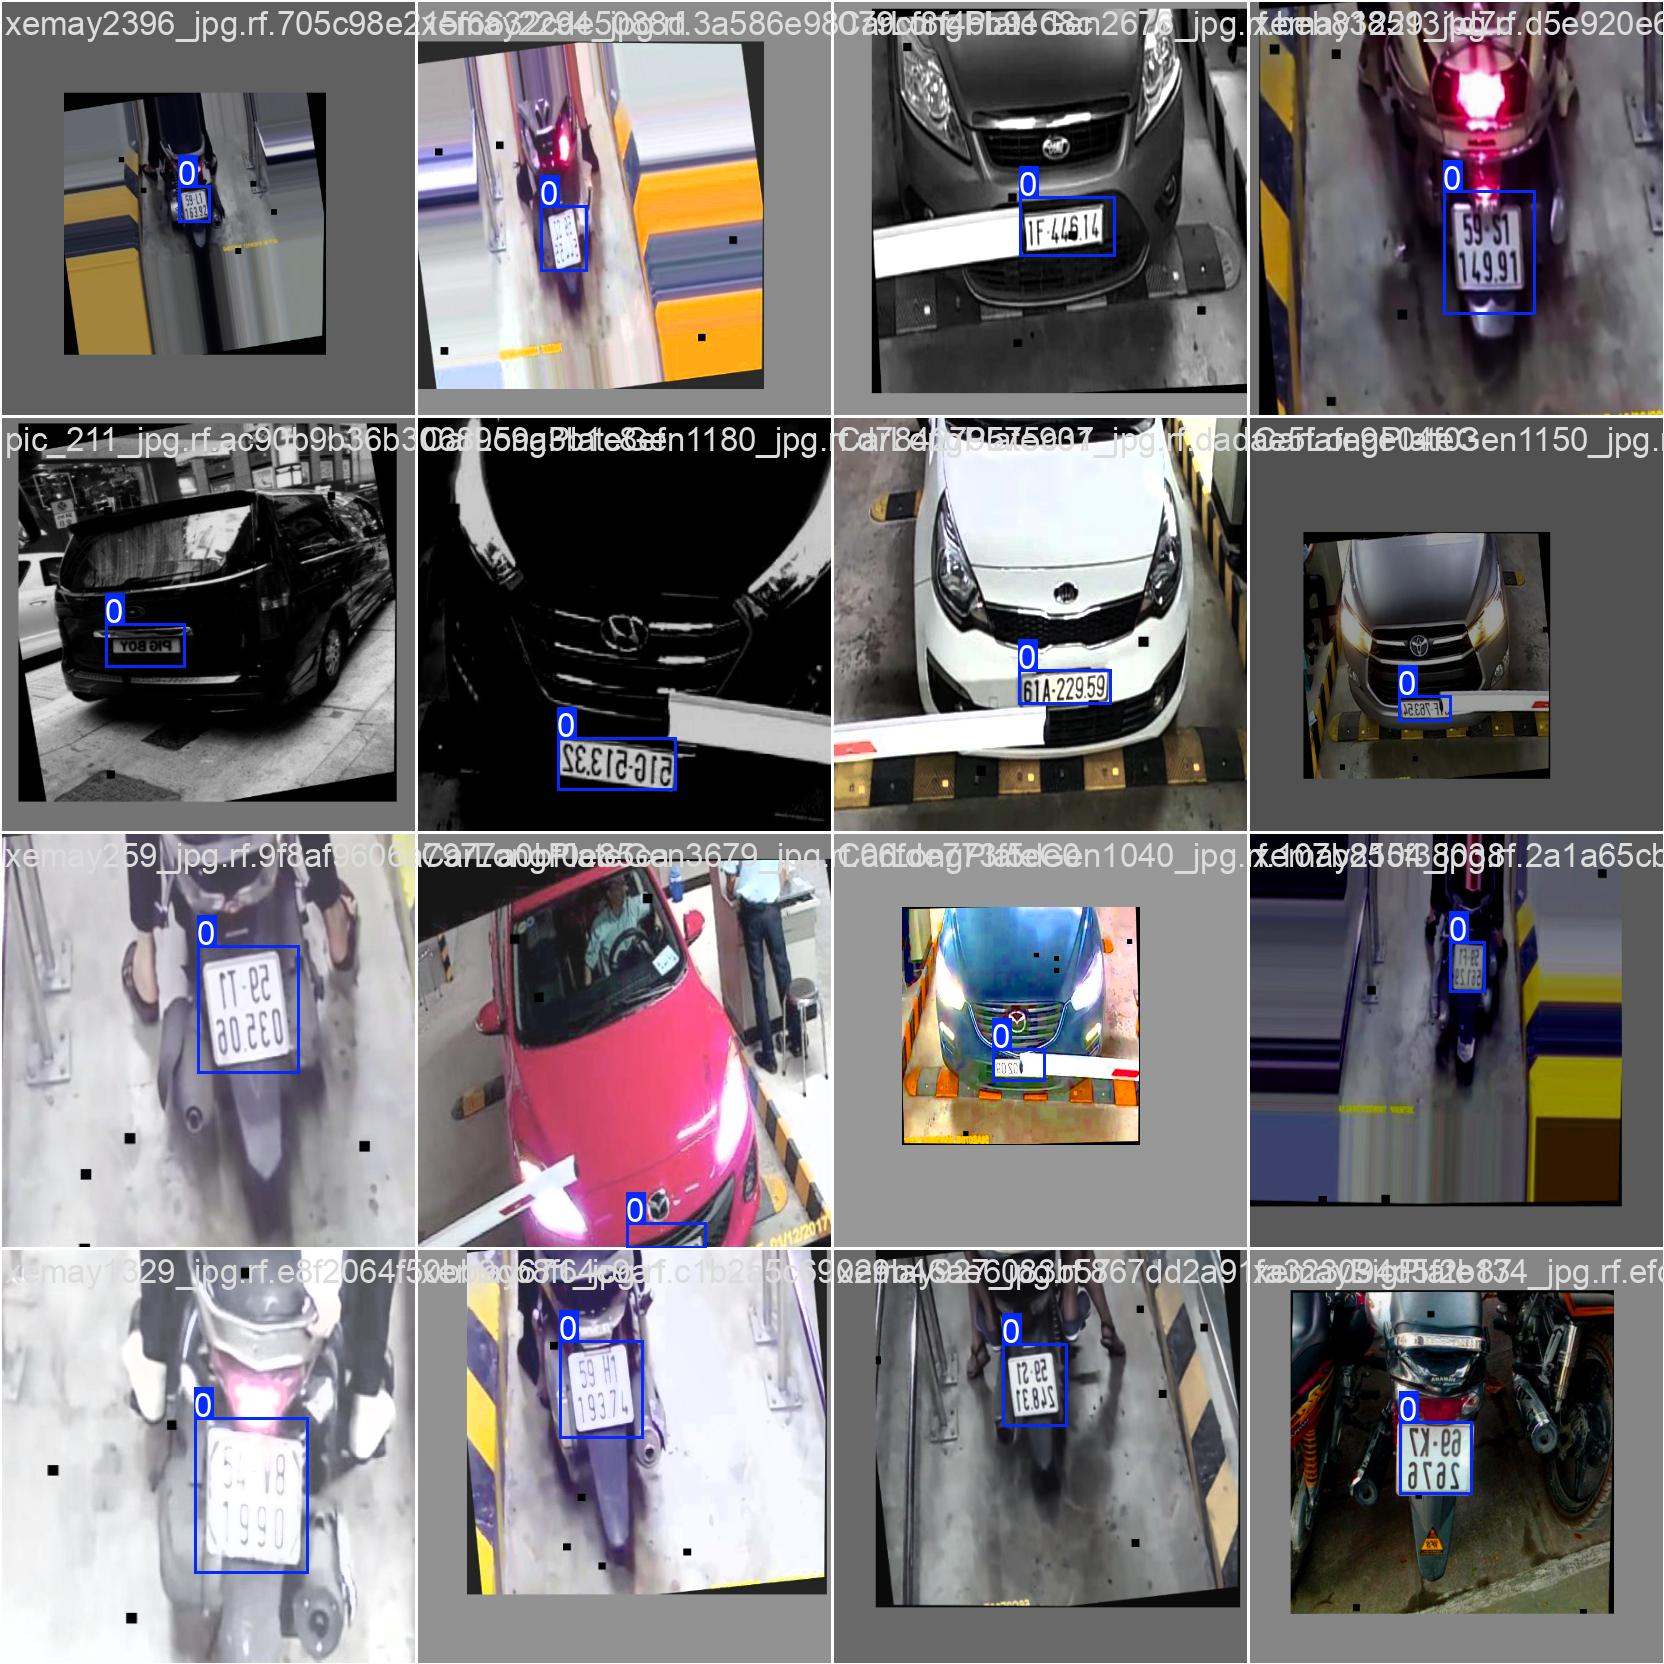

In [13]:
Image("/content/runs/detect/train/train_batch0.jpg", width=600)

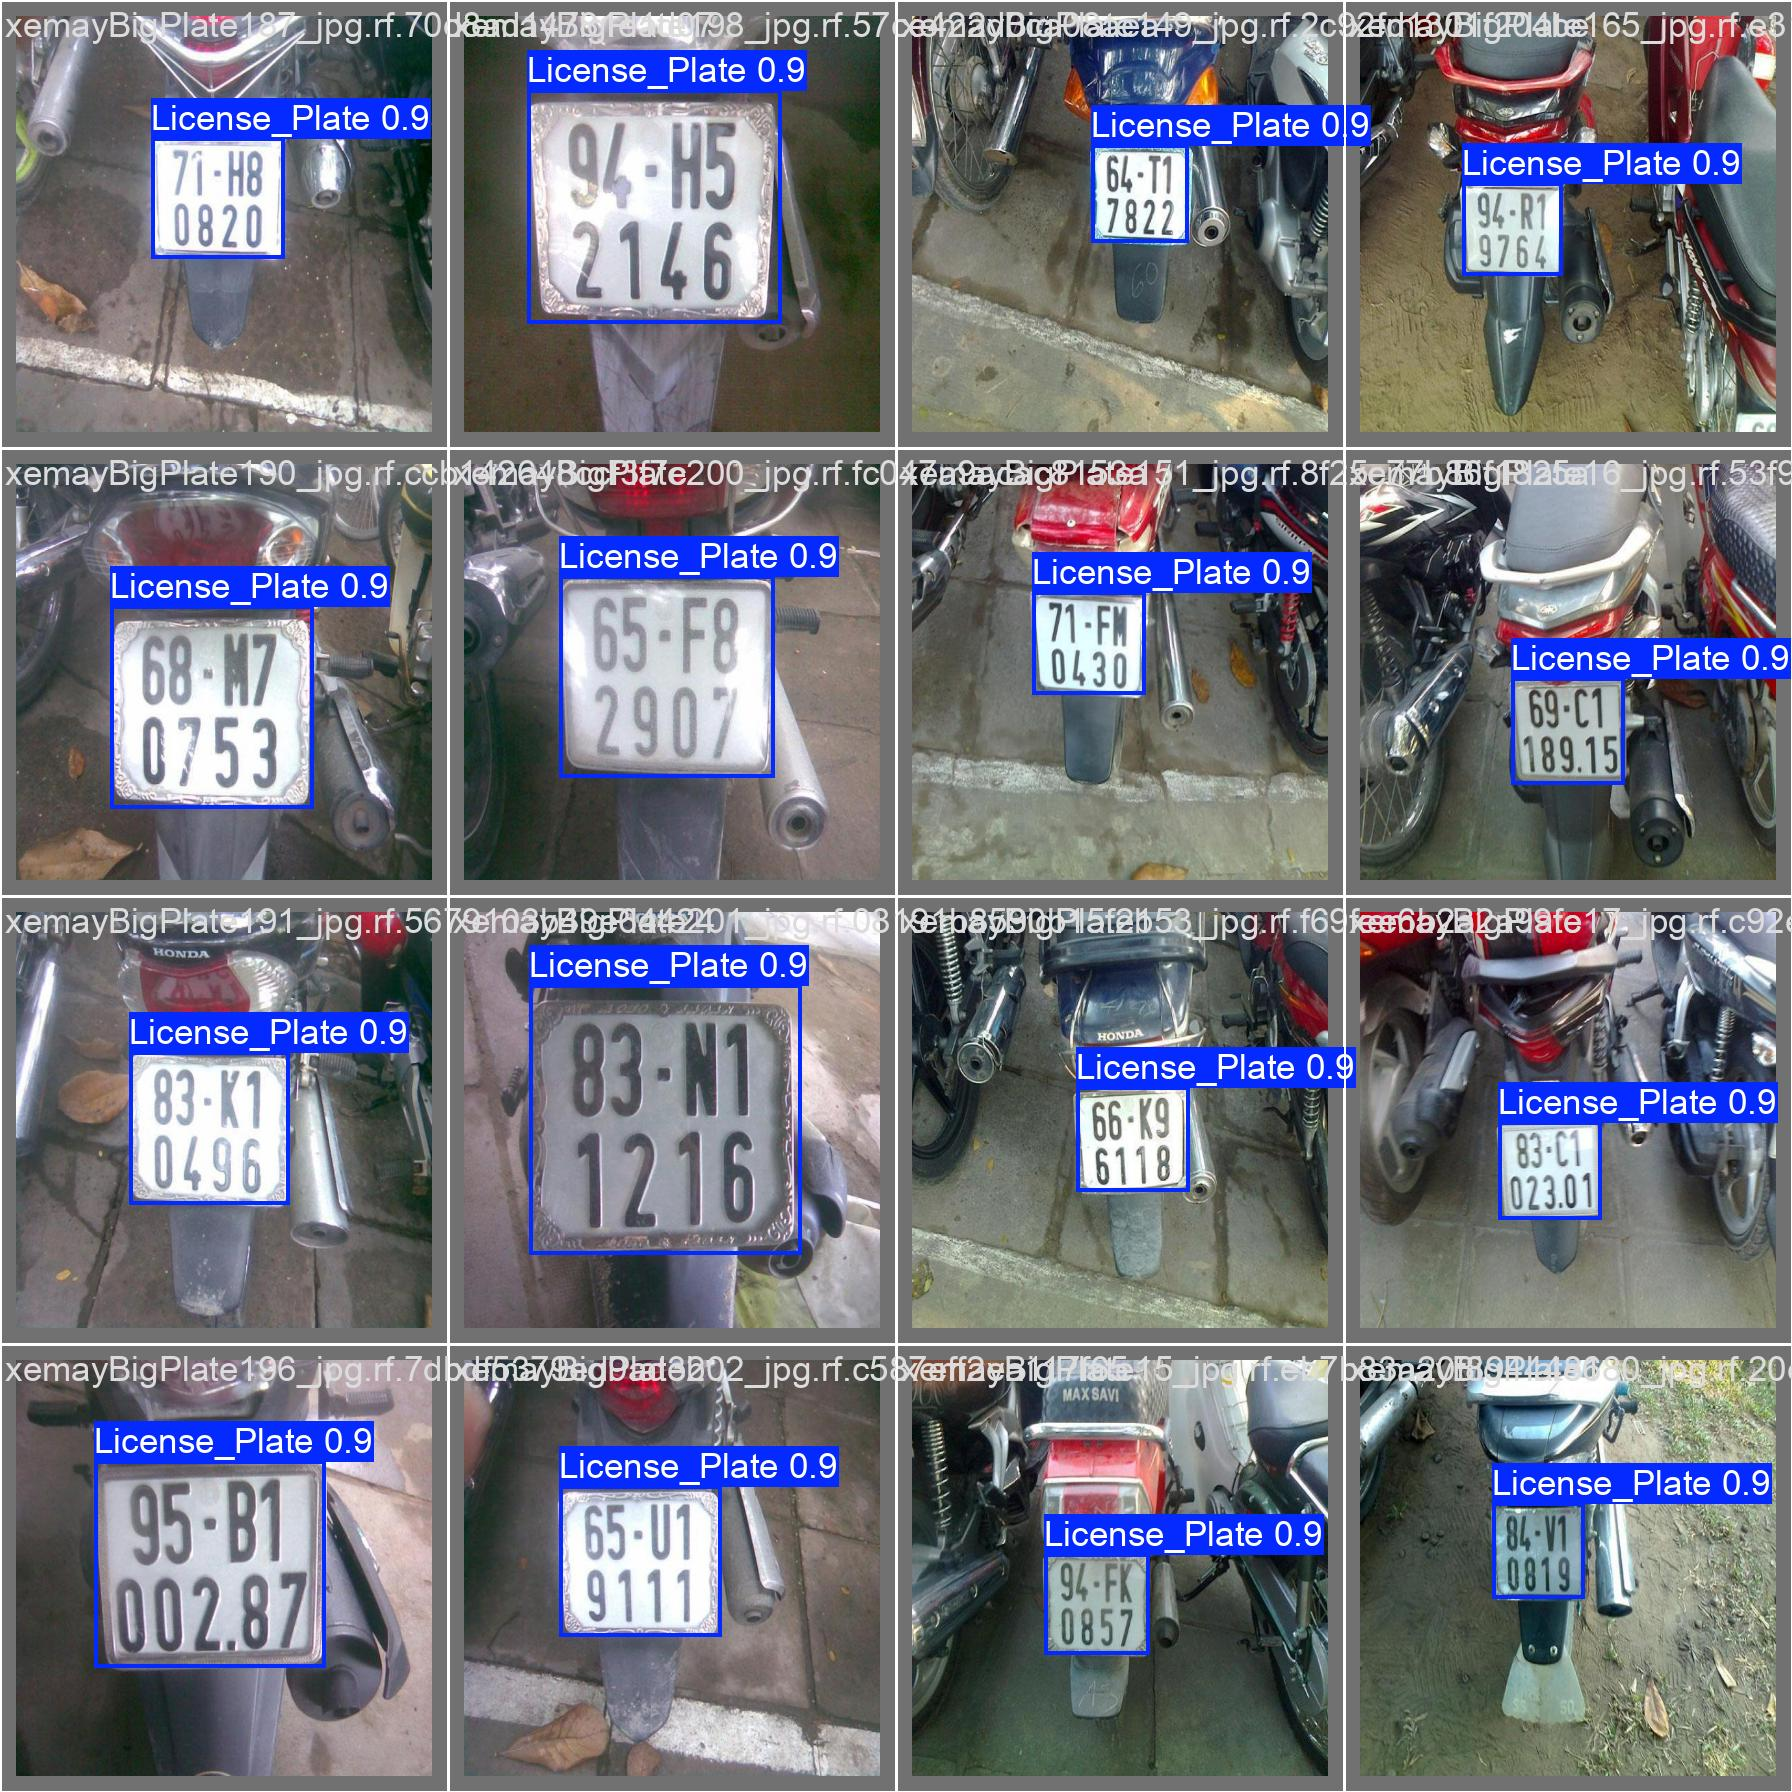

In [14]:
Image("/content/runs/detect/train/val_batch0_pred.jpg", width=600)

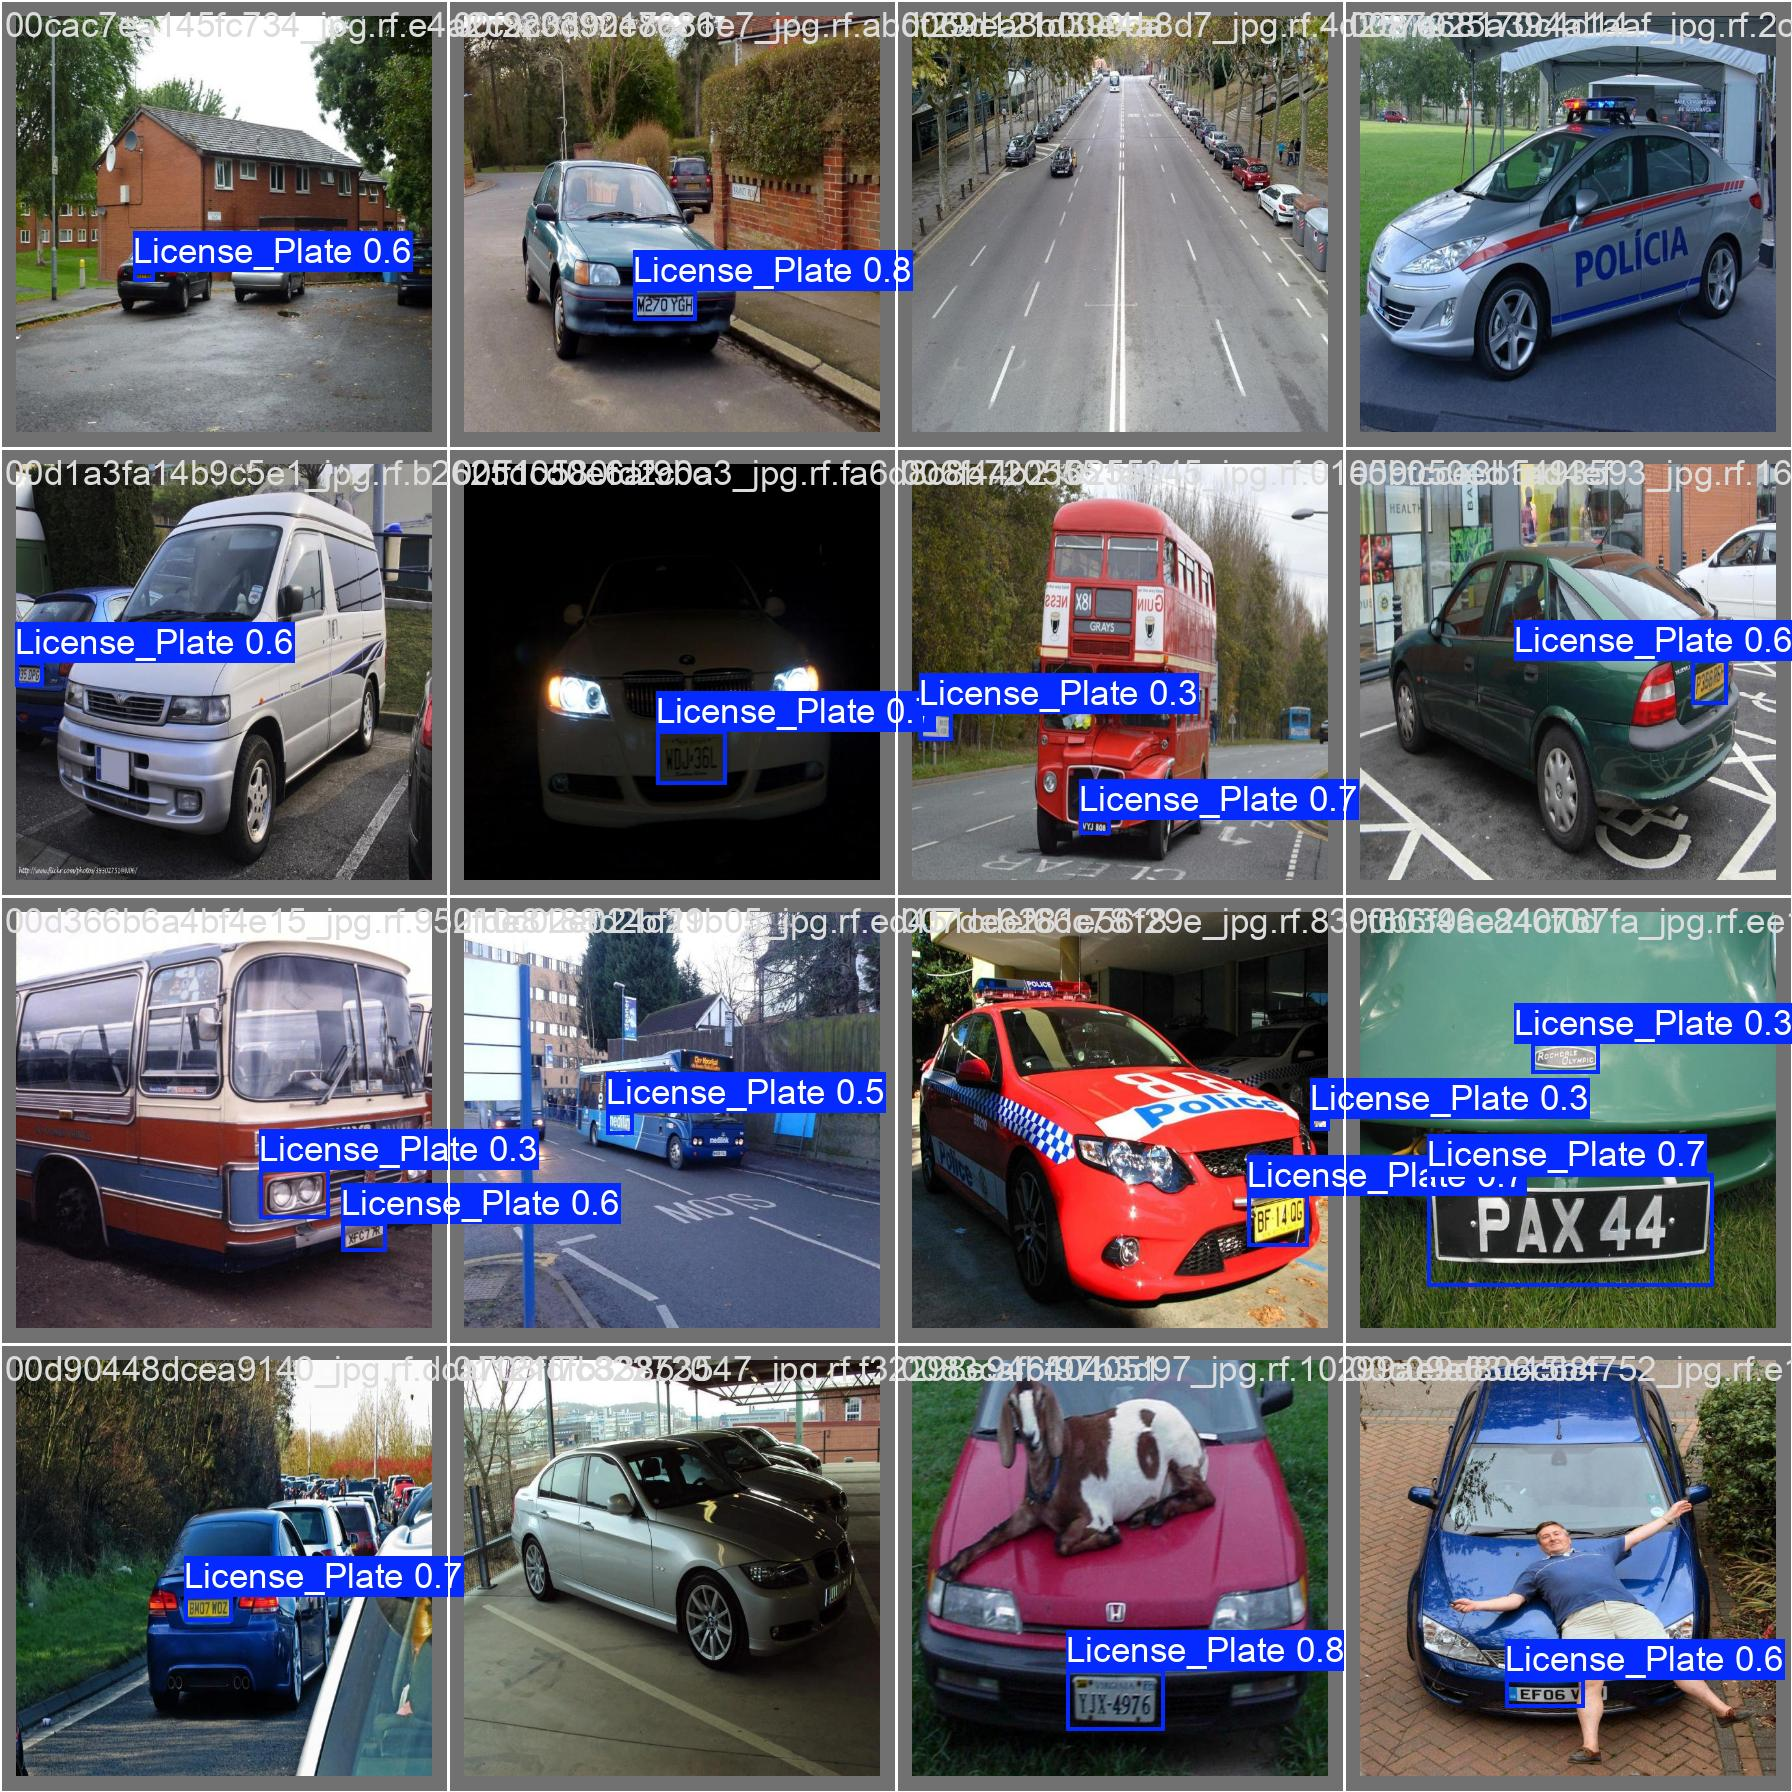

In [15]:
Image("/content/runs/detect/train/val_batch1_pred.jpg", width=600)

In [16]:
!yolo task=detect mode=val model="/content/runs/detect/train/weights/best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.9 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/License-Plate-Recognition-4/valid/labels.cache... 2046 images, 3 backgrounds, 0 corrupt: 100% 2046/2046 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 128/128 [00:16<00:00,  7.79it/s]
                   all       2046       2132      0.983      0.945      0.976      0.679
Speed: 0.2ms preprocess, 2.3ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [17]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True


Ultralytics 8.3.9 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs

image 1/1019 /content/License-Plate-Recognition-4/test/images/0002a5b67e5f0909_jpg.rf.07ca41e79eb878b14032f650f34d0967.jpg: 416x416 2 License_Plates, 13.4ms
image 2/1019 /content/License-Plate-Recognition-4/test/images/000812dcf304a8e7_jpg.rf.559f904bc045f68ee947796a1b561d8f.jpg: 416x416 1 License_Plate, 8.8ms
image 3/1019 /content/License-Plate-Recognition-4/test/images/0010f4c10f7ab07e_jpg.rf.92344aa620e23aacc490273e32343595.jpg: 416x416 2 License_Plates, 8.8ms
image 4/1019 /content/License-Plate-Recognition-4/test/images/001cdd25e148cd36_jpg.rf.eca53e55e3cf5986bcfd95bc277b6438.jpg: 416x416 1 License_Plate, 8.4ms
image 5/1019 /content/License-Plate-Recognition-4/test/images/002519f868563098_jpg.rf.b9450b9265c92d8d3bd96bdfeff635e5.jpg: 416x416 1 License_Plate, 8.1ms
image 6/1019 /content/License-Plate-Recognition-4/test/im

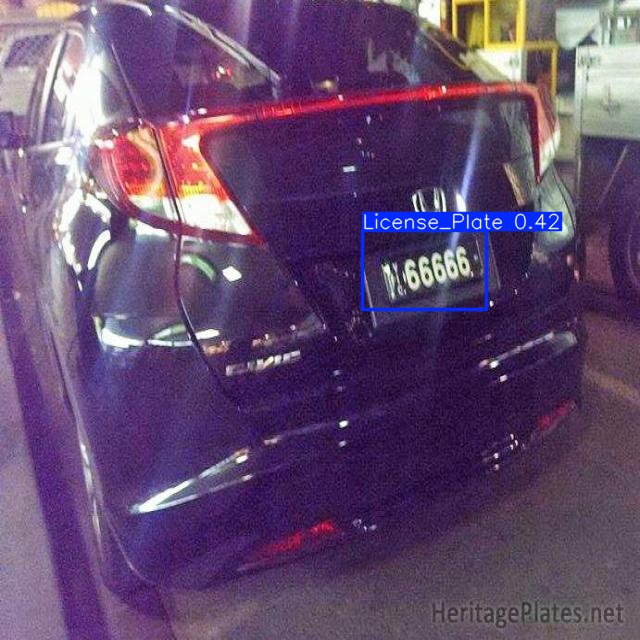

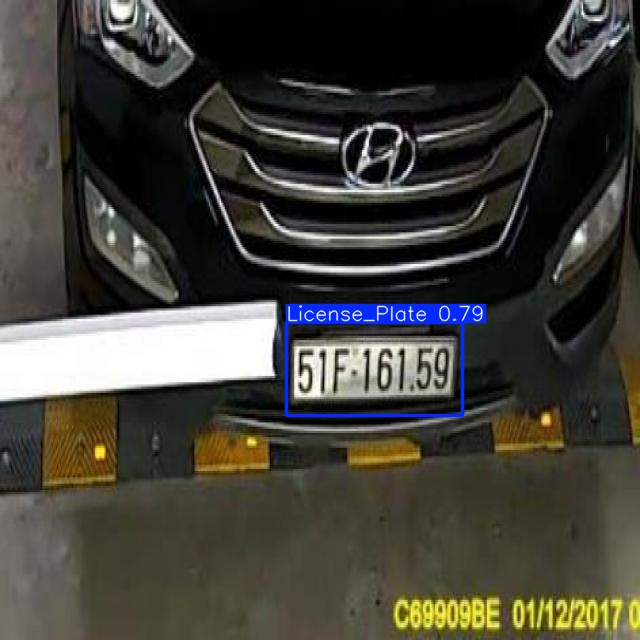

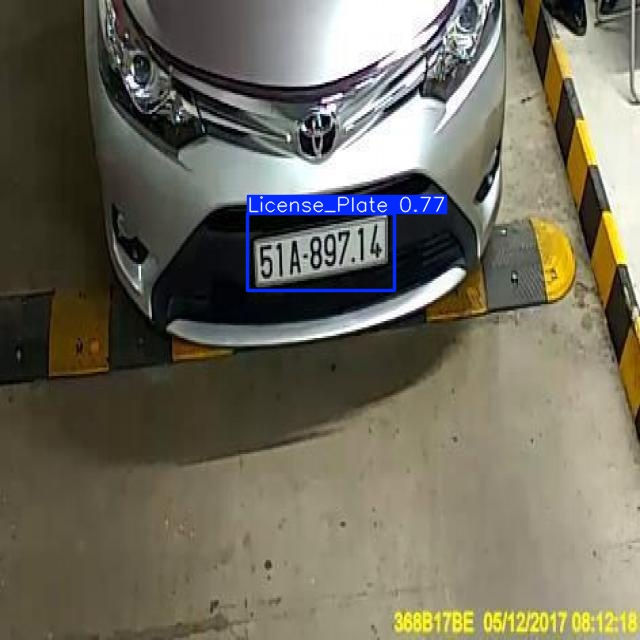

In [18]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [19]:
!gdown "https://drive.google.com/file/d/1a74ZLorJJNqRZMpcQMW4qX7GvS6EKQEJ/view?usp=sharing"

/usr/local/lib/python3.10/dist-packages/gdown/parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=1a74ZLorJJNqRZMpcQMW4qX7GvS6EKQEJ
  warnings.warn(
Downloading...
From: https://drive.google.com/file/d/1a74ZLorJJNqRZMpcQMW4qX7GvS6EKQEJ/view?usp=sharing
To: /content/view?usp=sharing
8.95kB [00:00, 16.7MB/s]


In [21]:
!gdown "https://drive.google.com/uc?id=1a74ZLorJJNqRZMpcQMW4qX7GvS6EKQEJ"


Downloading...
From: https://drive.google.com/uc?id=1a74ZLorJJNqRZMpcQMW4qX7GvS6EKQEJ
To: /content/0.png
100% 313k/313k [00:00<00:00, 106MB/s]


In [22]:
!yolo task=detect mode=predict model= "/content/runs/detect/train/weights/best.pt" conf=0.25 source=0.png save=True


Ultralytics 8.3.9 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/0.png: 288x416 1 License_Plate, 44.7ms
Speed: 1.4ms preprocess, 44.7ms inference, 611.8ms postprocess per image at shape (1, 3, 288, 416)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


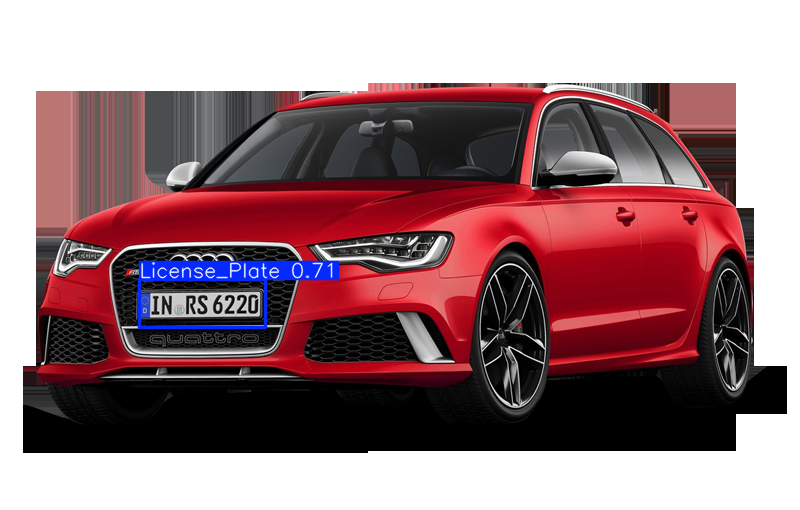

In [23]:
Image("/content/runs/detect/predict2/0.png", width=600)

In [24]:
!gdown "https://drive.google.com/uc?id=1bFnXhLbs8qE1t6Tb127TSd9CIH0F2vE8"


Downloading...
From: https://drive.google.com/uc?id=1bFnXhLbs8qE1t6Tb127TSd9CIH0F2vE8
To: /content/video.mp4
100% 4.46M/4.46M [00:00<00:00, 41.4MB/s]


In [26]:
!yolo task=detect mode=predict model= "/content/runs/detect/train/weights/best.pt" conf=0.25 source="video.mp4" save=True


Ultralytics 8.3.9 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs

video 1/1 (frame 1/161) /content/video.mp4: 256x416 1 License_Plate, 68.0ms
video 1/1 (frame 2/161) /content/video.mp4: 256x416 1 License_Plate, 12.7ms
video 1/1 (frame 3/161) /content/video.mp4: 256x416 1 License_Plate, 18.1ms
video 1/1 (frame 4/161) /content/video.mp4: 256x416 1 License_Plate, 13.7ms
video 1/1 (frame 5/161) /content/video.mp4: 256x416 1 License_Plate, 12.6ms
video 1/1 (frame 6/161) /content/video.mp4: 256x416 2 License_Plates, 11.5ms
video 1/1 (frame 7/161) /content/video.mp4: 256x416 1 License_Plate, 15.4ms
video 1/1 (frame 8/161) /content/video.mp4: 256x416 1 License_Plate, 12.7ms
video 1/1 (frame 9/161) /content/video.mp4: 256x416 1 License_Plate, 13.5ms
video 1/1 (frame 10/161) /content/video.mp4: 256x416 1 License_Plate, 11.3ms
video 1/1 (frame 11/161) /content/video.mp4: 256x416 1 License_Plate, 14.

In [27]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/detect/predict3/PPE_Part1.avi'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""

""" % data_url)

TypeError: not all arguments converted during string formatting

In [28]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/detect/predict3/video.avi'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

# Compress the video
os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Encode the compressed video in base64
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

# Display the video
HTML(f"""
<video width="640" height="480" controls>
      <source src="{data_url}" type="video/mp4">
</video>
""")


In [29]:
from google.colab import drive
drive.mount('/content/drive')


ValueError: mount failed